In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imread, imsave

### Problem 1

In [5]:
x = np.linspace(-1,1,20)
t = np.linspace(0,.2,250)
dx = x[1]-x[0]
dt = t[1]-t[0]
guess = [3*x[i]+4 for i in range(len(x))]
print(dt/dx**2)

0.0724899598394


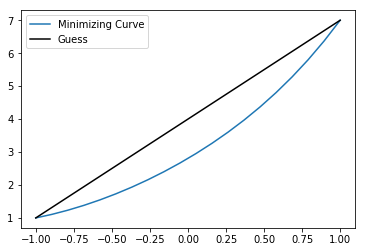

In [15]:
Y = guess
tol = 10e-5
for k in range(len(t)) :
    Y_new = [Y[0]] + [Y[i]+dt*(-1-((Y[i+1]-Y[i-1])/(2*dx))**2+Y[i]*((Y[i+1]-2*Y[i]+Y[i-1])/(dx)**2)) for i in range(1,len(Y)-1)] + [Y[-1]]
    if sum([(Y_new[j] - Y[j])**2 for j in range(len(Y))]) <= tol**2 :
        break
    else :
        Y = Y_new
plt.plot(x,Y,label='Minimizing Curve')
plt.plot(x,guess,'-k',label='Guess')
plt.legend()
plt.show()

### Problem 2

In [3]:
imagename = 'balloons_bw.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, flatten=True) * (1. / 255)
IM_x, IM_y = IM.shape
for lost in range(changed_pixels):
    x_,y_ = np.random.randint(1,IM_x-2), np.random.randint(1,IM_y-2)
    val = .1*np.random.randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [48]:
lamb = 40
dx = 1
dy = 1
dt = 1e-3
Y = np.copy(IM)
for k in range(len(t)) :
    u_xx = np.zeros_like(Y)
    u_yy = np.zeros_like(Y)
    u_xx[1:-1,1:-1] = ((np.roll(Y,-1,axis=1) - 2*Y + np.roll(Y,1,axis=1))/(dx**2))[1:-1,1:-1]
    u_yy[1:-1,1:-1] = ((np.roll(Y,-1,axis=0) - 2*Y + np.roll(Y,1,axis=0))/(dy**2))[1:-1,1:-1]
    Y -= dt*(Y - IM - lamb*(u_xx+u_yy))

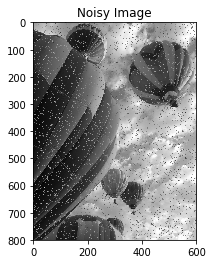

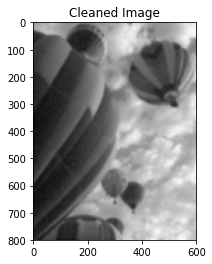

In [50]:
plt.imshow(IM,cmap='gray')
plt.title('Noisy Image')
plt.show()
plt.imshow(Y,cmap='gray')
plt.title('Cleaned Image')
plt.show()

### Problem 3

In [8]:
lamb = 1
dx = 1
dy = 1
dt = 1e-3
eps = 1e-5
Y = np.copy(IM)
for k in range(len(t)) :
    u_x = np.zeros_like(Y)
    u_y = np.zeros_like(Y)
    u_xy = np.zeros_like(Y)
    u_xx = np.zeros_like(Y)
    u_yy = np.zeros_like(Y)
    u_x[1:-1,1:-1] = ((np.roll(Y,-1,axis=1) -  np.roll(Y,1,axis=1))/2)[1:-1,1:-1]
    u_y[1:-1,1:-1] = ((np.roll(Y,-1,axis=0) - np.roll(Y,1,axis=0))/2)[1:-1,1:-1]
    u_xx[1:-1,1:-1] = (np.roll(Y,-1,axis=1) - 2*Y + np.roll(Y,1,axis=1))[1:-1,1:-1]
    u_yy[1:-1,1:-1] = (np.roll(Y,-1,axis=0) - 2*Y + np.roll(Y,1,axis=0))[1:-1,1:-1]
    u_xy[1:-1,1:-1] = ((np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2)[1:-1,1:-1]
    Y += dt*(-lamb*(Y - IM) + (u_xx*u_y**2+u_yy*u_x**2-2*u_x*u_y*u_xy)/((eps+u_x**2+u_y**2)**(3/2)))

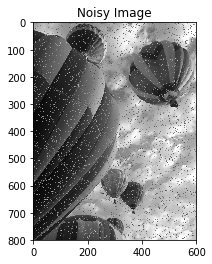

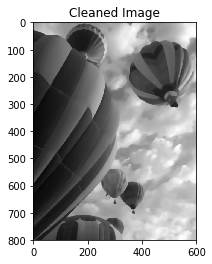

In [9]:
plt.imshow(IM,cmap='gray')
plt.title('Noisy Image')
plt.show()
plt.imshow(Y,cmap='gray')
plt.title('Cleaned Image')
plt.show()